## Финальное соревнование

##### Автор: [Радослав Нейчев](https://www.linkedin.com/in/radoslav-neychev/), @neychev

В данном задании вас ждет неизвестная зависимость. Ваша основная задача: **построить две лучших модели**, минимизирующих среднеквадратичную ошибку (MSE):
1. На первую модель не налагается ограничений.
2. Вторая модель должна быть **линейной**, т.е. представлять собой линейную комбинацию признаков плюс свободный член: $\boldsymbol{w}^{\top}\boldsymbol{x} + b$. При этом __вы можете использовать базовые математические операции для преобразования признаков__: np.exp, np.log, np.pow (полный список доступен в [документации](https://numpy.org/doc/stable/reference/routines.math.html)), а также линейные операции над ними (сумма, умножение на число и пр.). Для преобразования признаков вам будет необходимо написать функцию `my_transformation`. __Кол-во параметров (весов) используемых второй моделью не должно превышать 15 (включая свободный член).__

Настоятельно рекомендуем написать код "с нуля", лишь поглядывая на готовые примеры, а не просто "скопировать-вставить". Это поможет вам в будущем писать код более уверенно

In [1]:
import os
import json

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
 
from sklearn.model_selection import train_test_split
np.random.seed(42)

Загрузка данных происходит ниже. Если она не срабатывает, самостоятельно скачайте файл `hw_final_open_data.npy` и положите его в ту же директорию, что и ноутбук.

In [2]:
#!wget https://raw.githubusercontent.com/girafe-ai/ml-course/23f_yandex_ml_trainings/homeworks/assignment_final/hw_final_open_data.npy -O hw_final_open_data.npy
#!wget https://raw.githubusercontent.com/girafe-ai/ml-course/23f_yandex_ml_trainings/homeworks/assignment_final/hw_final_open_target.npy -O hw_final_open_data.npy

In [3]:
assert os.path.exists('hw_final_open_data.npy'), 'Please, download `hw_final_open_data.npy` and place it in the working directory'
assert os.path.exists('hw_final_open_target.npy'), 'Please, download `hw_final_open_target.npy` and place it in the working directory'
data = np.load('hw_final_open_data.npy', allow_pickle=False)
target = np.load('hw_final_open_target.npy', allow_pickle=False)

Разбивка на `train` и `val` опциональна и сделана для вашего удобства.

In [4]:
train_x, valid_x, train_y, valid_y = train_test_split(data, target, test_size=0.3)

In [5]:
df = pd.DataFrame(data)
df['target'] = target

In [6]:
df.to_csv('data.csv', index=False)
df

,0,1,2,3,4,5,6,target
0,-0.565814,-0.430544,-0.56863,-0.379486,-0.527420,-0.160691,-0.575438,0.382870
1,-0.562880,-0.051177,-0.56863,-0.134094,-0.506339,0.795601,-0.575438,2.742402
2,-0.560292,0.987380,-0.56863,0.344372,-0.481199,3.249530,-0.575438,7.239643
3,-0.561336,0.434373,-0.56863,0.107739,-0.492241,1.960089,-0.575438,4.731191
4,-0.563982,-0.249578,-0.56863,-0.251161,-0.515020,0.304072,-0.575438,1.317211
...,...,...,...,...,...,...,...,...
795,-0.562995,-0.076328,-0.56863,-0.148095,-0.507292,0.733981,-0.575438,2.403090
796,-0.566049,-0.445115,-0.56863,-0.391541,-0.528851,-0.199316,-0.575438,0.116159
797,-0.560825,0.675599,-0.56863,0.214591,-0.487007,2.526183,-0.575438,5.261471
798,-0.561542,0.350201,-0.56863,0.068784,-0.494273,1.760945,-0.575438,4.034624


### EDA

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt

import seaborn as sns

/home/pablo/miniconda3/envs/tren_ml/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/pablo/miniconda3/envs/tren_ml/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='target', ylabel='Count'>

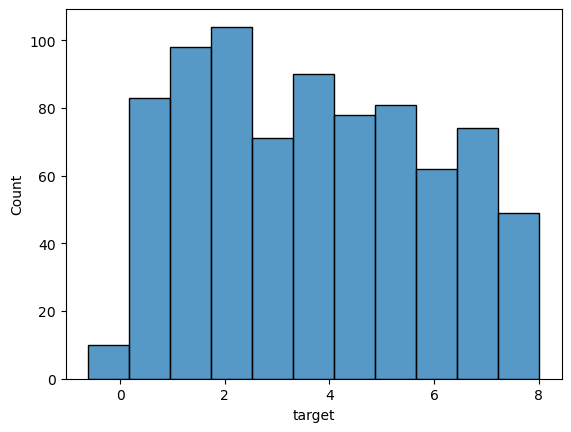

In [8]:
sns.histplot(df['target'])

/home/pablo/miniconda3/envs/tren_ml/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/pablo/miniconda3/envs/tren_ml/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/pablo/miniconda3/envs/tren_ml/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/pablo/miniconda3/envs/tren_ml/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be rem

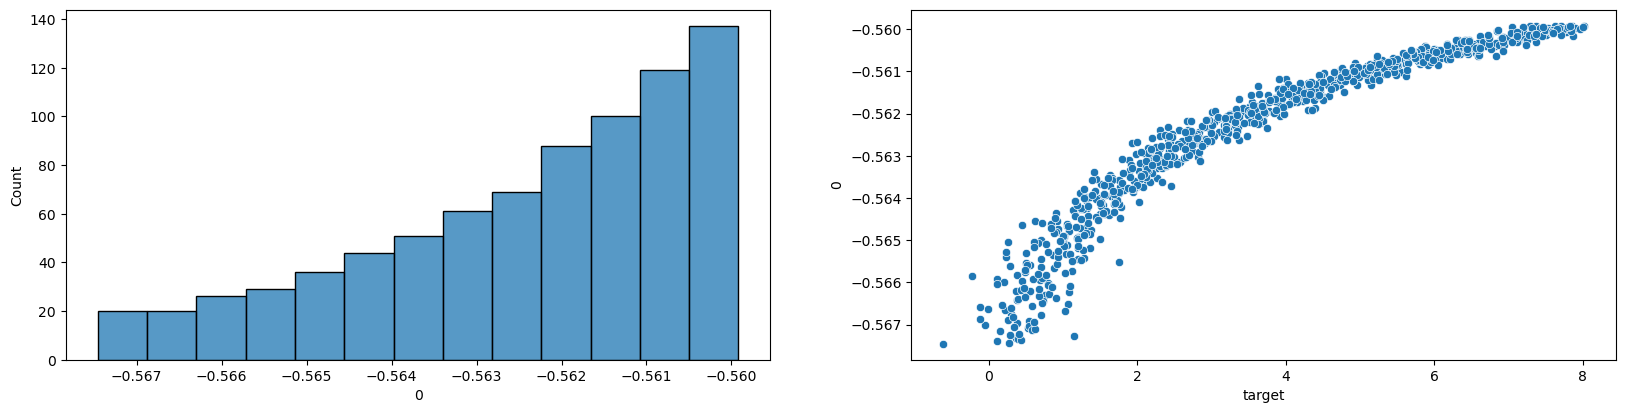

In [9]:
fig = plt.figure(figsize= (20,10))
ax1 = fig.add_subplot(221)
sns.histplot(df[0])
#------------------
ax2 = fig.add_subplot(222) 
sns.scatterplot(data = df,x = df['target'], y = df[0])
plt.show()

/home/pablo/miniconda3/envs/tren_ml/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/pablo/miniconda3/envs/tren_ml/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/pablo/miniconda3/envs/tren_ml/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/pablo/miniconda3/envs/tren_ml/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be rem

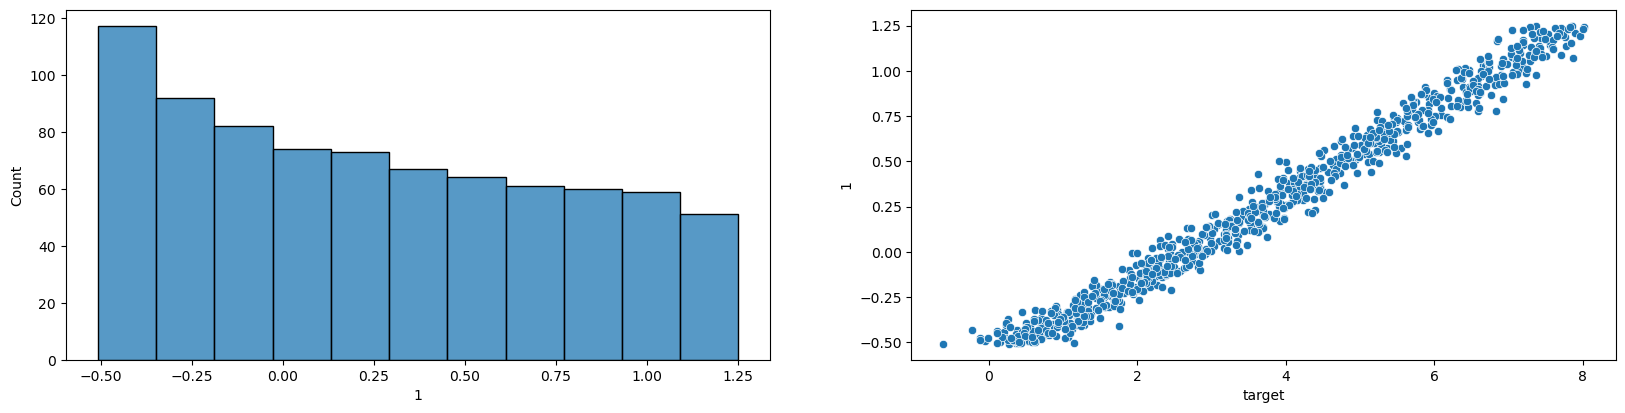

In [10]:
fig = plt.figure(figsize= (20,10))
ax1 = fig.add_subplot(221)
sns.histplot(df[1])
#------------------
ax2 = fig.add_subplot(222) 
sns.scatterplot(data = df,x = df['target'], y = df[1])
plt.show()

/home/pablo/miniconda3/envs/tren_ml/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/pablo/miniconda3/envs/tren_ml/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/pablo/miniconda3/envs/tren_ml/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/pablo/miniconda3/envs/tren_ml/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be rem

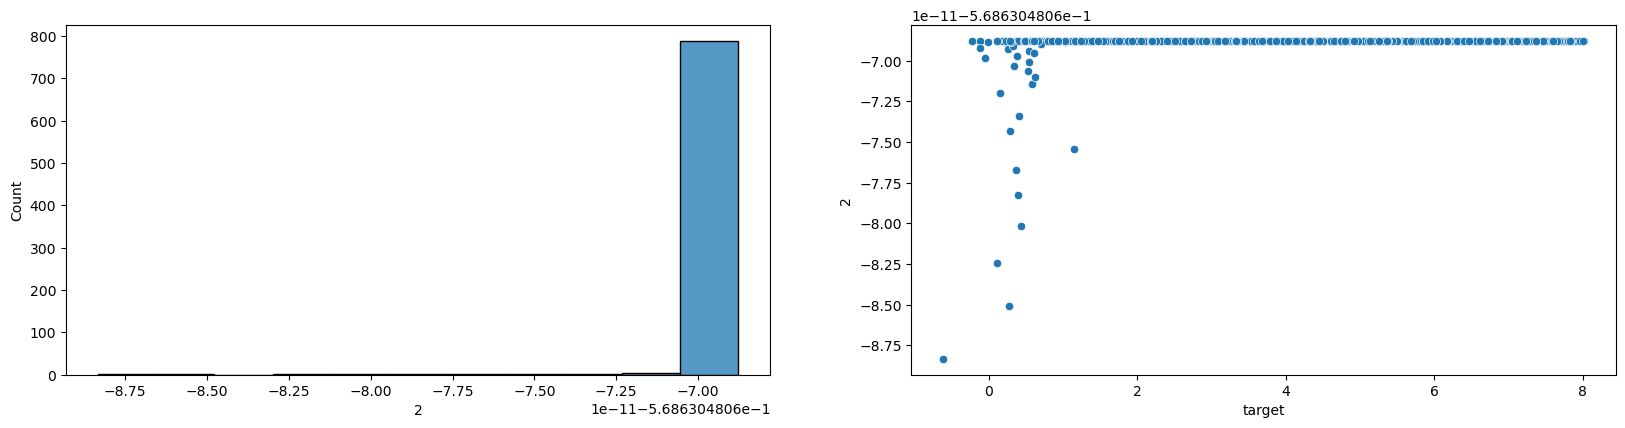

In [11]:
fig = plt.figure(figsize= (20,10))
ax1 = fig.add_subplot(221)
sns.histplot(df[2])
#------------------
ax2 = fig.add_subplot(222) 
sns.scatterplot(data = df,x = df['target'], y = df[2])
plt.show()

/home/pablo/miniconda3/envs/tren_ml/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/pablo/miniconda3/envs/tren_ml/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/pablo/miniconda3/envs/tren_ml/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/pablo/miniconda3/envs/tren_ml/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be rem

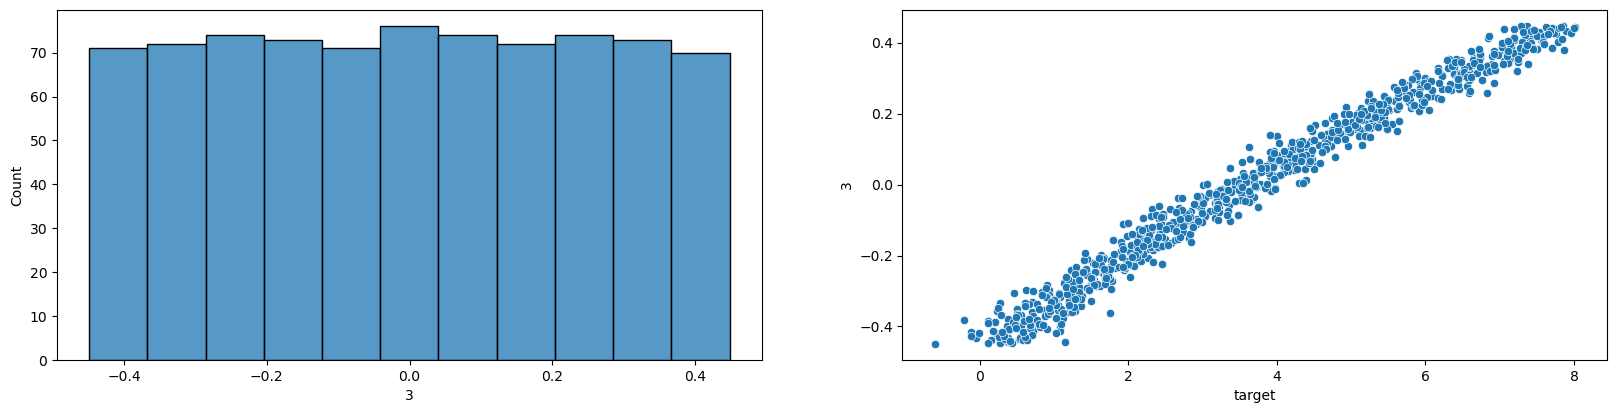

In [12]:
fig = plt.figure(figsize= (20,10))
ax1 = fig.add_subplot(221)
sns.histplot(df[3])
#------------------
ax2 = fig.add_subplot(222) 
sns.scatterplot(data = df,x = df['target'], y = df[3])
plt.show()

/home/pablo/miniconda3/envs/tren_ml/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/pablo/miniconda3/envs/tren_ml/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/pablo/miniconda3/envs/tren_ml/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/pablo/miniconda3/envs/tren_ml/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be rem

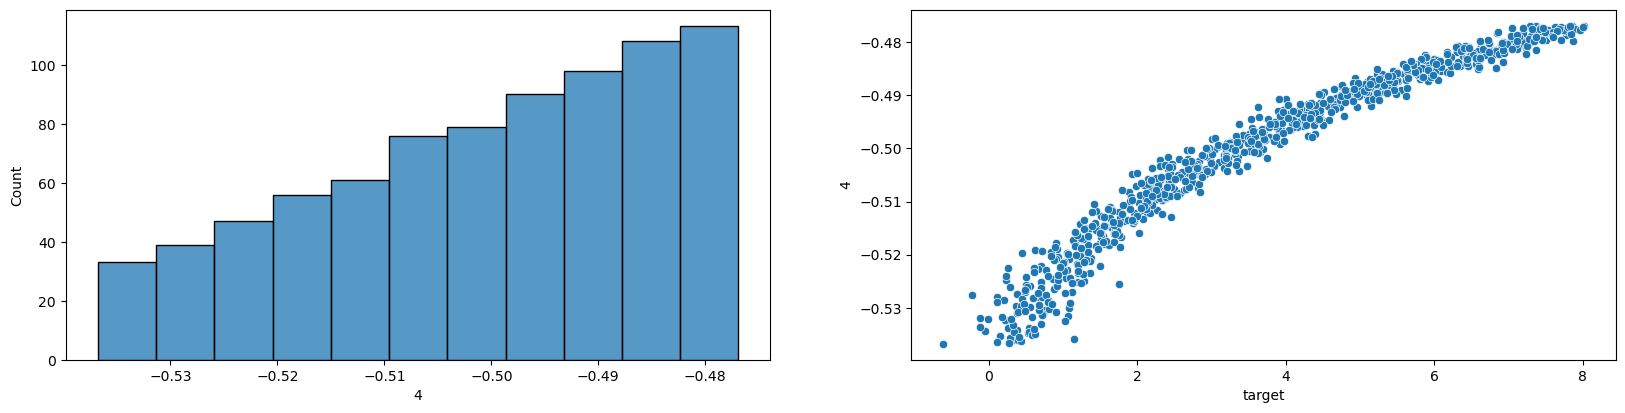

In [13]:
fig = plt.figure(figsize= (20,10))
ax1 = fig.add_subplot(221)
sns.histplot(df[4])
#------------------
ax2 = fig.add_subplot(222) 
sns.scatterplot(data = df,x = df['target'], y = df[4])
plt.show()

/home/pablo/miniconda3/envs/tren_ml/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/pablo/miniconda3/envs/tren_ml/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/pablo/miniconda3/envs/tren_ml/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/pablo/miniconda3/envs/tren_ml/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be rem

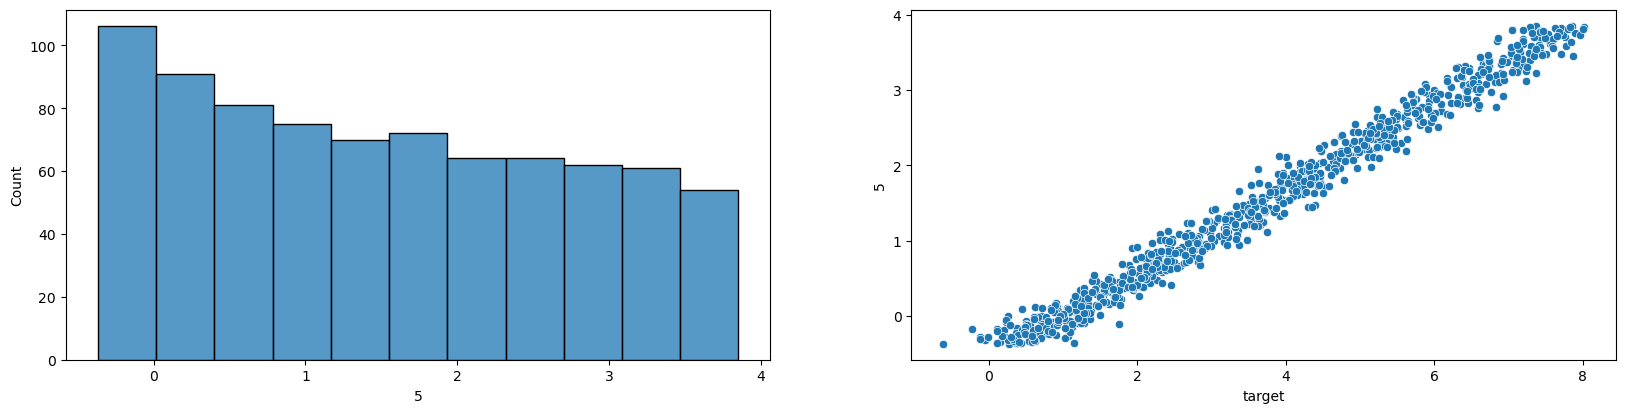

In [14]:
fig = plt.figure(figsize= (20,10))
ax1 = fig.add_subplot(221)
sns.histplot(df[5])
#------------------
ax2 = fig.add_subplot(222) 
sns.scatterplot(data = df,x = df['target'], y = df[5])
plt.show()

/home/pablo/miniconda3/envs/tren_ml/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/pablo/miniconda3/envs/tren_ml/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/pablo/miniconda3/envs/tren_ml/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/pablo/miniconda3/envs/tren_ml/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be rem

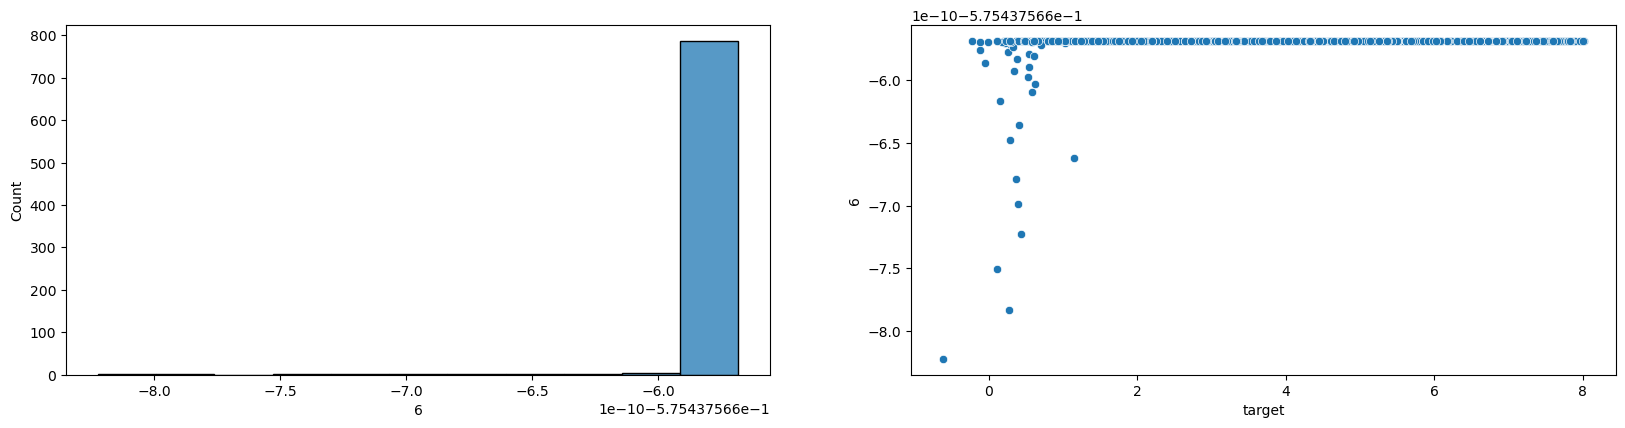

In [15]:
fig = plt.figure(figsize= (20,10))
ax1 = fig.add_subplot(221)
sns.histplot(df[6])
#------------------
ax2 = fig.add_subplot(222) 
sns.scatterplot(data = df,x = df['target'], y = df[6])
plt.show()

/home/pablo/miniconda3/envs/tren_ml/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/pablo/miniconda3/envs/tren_ml/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/pablo/miniconda3/envs/tren_ml/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/pablo/miniconda3/envs/tren_ml/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be rem

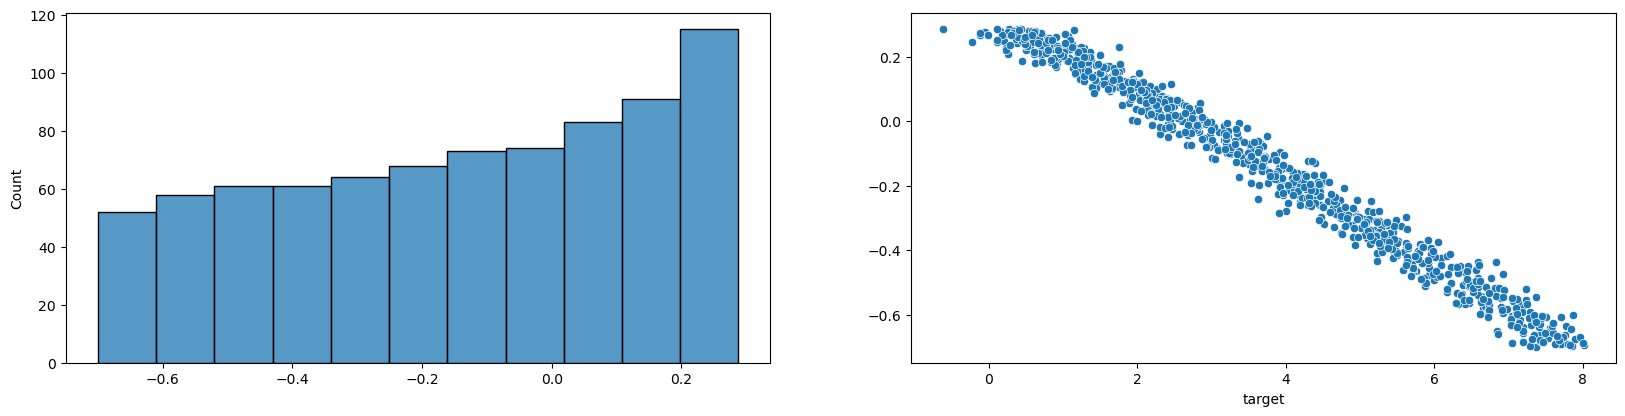

In [16]:
fig = plt.figure(figsize= (20,10))
ax1 = fig.add_subplot(221)
sns.histplot(df[0] * df[1])
#------------------
ax2 = fig.add_subplot(222) 
sns.scatterplot(data = df,x = df['target'], y = df[0] * df[1])
plt.show()

In [17]:
df.describe()

,0,1,2,3,4,5,6,target
count,800.000000,800.000000,8.000000e+02,800.000000,800.000000,800.000000,8.000000e+02,800.000000
mean,-0.562411,0.258281,-5.686305e-01,-0.000670,-0.500565,1.519475,-5.754376e-01,3.708603
std,0.001938,0.515209,1.242971e-12,0.257686,0.016183,1.233878,1.666807e-11,2.198260
min,-0.567454,-0.507269,-5.686305e-01,-0.448910,-0.536785,-0.367869,-5.754376e-01,-0.607470
25%,-0.563697,-0.206689,-5.686305e-01,-0.224382,-0.512874,0.411514,-5.754376e-01,1.799005
50%,-0.561951,0.203518,-5.686305e-01,-0.001649,-0.498149,1.411508,-5.754376e-01,3.627967
75%,-0.560793,0.692465,-5.686305e-01,0.221829,-0.486669,2.565533,-5.754376e-01,5.499775
max,-0.559918,1.250293,-5.686305e-01,0.448173,-0.476899,3.853662,-5.754376e-01,8.013126


In [18]:
df.corr()

,0,1,2,3,4,5,6,target
0,1.000000,0.937960,0.290153,0.966040,0.994517,0.943603,0.300029,0.939754
1,0.937960,1.000000,0.169347,0.995510,0.968657,0.999853,0.175418,0.990131
2,0.290153,0.169347,1.000000,0.197351,0.251401,0.174195,0.999289,0.182176
3,0.966040,0.995510,0.197351,1.000000,0.987662,0.996982,0.204348,0.988741
4,0.994517,0.968657,0.251401,0.987662,1.000000,0.972709,0.260105,0.967082
5,0.943603,0.999853,0.174195,0.996982,0.972709,1.000000,0.180428,0.990537
6,0.300029,0.175418,0.999289,0.204348,0.260105,0.180428,1.000000,0.188047
target,0.939754,0.990131,0.182176,0.988741,0.967082,0.990537,0.188047,1.000000


In [19]:
df.columns = ['zero', 'one', 'two', 'three', 'four', 'five', 'six', 'target']

In [20]:
for i, col1 in enumerate(['zero', 'one', 'two', 'three', 'four', 'five', 'six']):
    for j, col2 in enumerate(['zero', 'one', 'two', 'three', 'four', 'five', 'six']):
        if j > i:  # Чтобы избежать повторного перемножения
            new_col_name = f"{col1}_x_{col2}"  # Новое имя колонки
            df[new_col_name] = df[col1] * df[col2]
            #print(col1, col2, new_col_name)

df.head()

,zero,one,two,three,four,five,six,target,zero_x_one,zero_x_two,...,two_x_three,two_x_four,two_x_five,two_x_six,three_x_four,three_x_five,three_x_six,four_x_five,four_x_six,five_x_six
0,-0.565814,-0.430544,-0.56863,-0.379486,-0.527420,-0.160691,-0.575438,0.382870,0.243608,0.321739,...,0.215787,0.299907,0.091374,0.327211,0.200148,0.060980,0.218370,0.084752,0.303497,0.092468
1,-0.562880,-0.051177,-0.56863,-0.134094,-0.506339,0.795601,-0.575438,2.742402,0.028807,0.320071,...,0.076250,0.287920,-0.452403,0.327211,0.067897,-0.106685,0.077162,-0.402844,0.291366,-0.457819
2,-0.560292,0.987380,-0.56863,0.344372,-0.481199,3.249530,-0.575438,7.239643,-0.553221,0.318599,...,-0.195820,0.273624,-1.847782,0.327211,-0.165711,1.119046,-0.198164,-1.563670,0.276900,-1.869901
3,-0.561336,0.434373,-0.56863,0.107739,-0.492241,1.960089,-0.575438,4.731191,-0.243829,0.319193,...,-0.061264,0.279903,-1.114566,0.327211,-0.053034,0.211178,-0.061997,-0.964835,0.283254,-1.127909
4,-0.563982,-0.249578,-0.56863,-0.251161,-0.515020,0.304072,-0.575438,1.317211,0.140758,0.320697,...,0.142818,0.292856,-0.172905,0.327211,0.129353,-0.076371,0.144527,-0.156603,0.296362,-0.174974


In [21]:
for i in ['zero', 'one', 'two', 'three', 'four', 'five', 'six']:
    new_col_name = f'log({i})'
    df[new_col_name] = np.log1p(df[i])

df.head()

,zero,one,two,three,four,five,six,target,zero_x_one,zero_x_two,...,four_x_five,four_x_six,five_x_six,log(zero),log(one),log(two),log(three),log(four),log(five),log(six)
0,-0.565814,-0.430544,-0.56863,-0.379486,-0.527420,-0.160691,-0.575438,0.382870,0.243608,0.321739,...,0.084752,0.303497,0.092468,-0.834283,-0.563074,-0.84079,-0.477207,-0.749549,-0.175177,-0.856696
1,-0.562880,-0.051177,-0.56863,-0.134094,-0.506339,0.795601,-0.575438,2.742402,0.028807,0.320071,...,-0.402844,0.291366,-0.457819,-0.827548,-0.052533,-0.84079,-0.143978,-0.705905,0.585340,-0.856696
2,-0.560292,0.987380,-0.56863,0.344372,-0.481199,3.249530,-0.575438,7.239643,-0.553221,0.318599,...,-1.563670,0.276900,-1.869901,-0.821645,0.686817,-0.84079,0.295927,-0.656235,1.446808,-0.856696
3,-0.561336,0.434373,-0.56863,0.107739,-0.492241,1.960089,-0.575438,4.731191,-0.243829,0.319193,...,-0.964835,0.283254,-1.127909,-0.824021,0.360728,-0.84079,0.102321,-0.677748,1.085219,-0.856696
4,-0.563982,-0.249578,-0.56863,-0.251161,-0.515020,0.304072,-0.575438,1.317211,0.140758,0.320697,...,-0.156603,0.296362,-0.174974,-0.830072,-0.287120,-0.84079,-0.289231,-0.723648,0.265492,-0.856696


In [22]:
for i in ['zero', 'one', 'two', 'three', 'four', 'five', 'six']:
    new_col_name = f'e({i})'
    df[new_col_name] = np.e ** df[i]

df.head()

,zero,one,two,three,four,five,six,target,zero_x_one,zero_x_two,...,log(four),log(five),log(six),e(zero),e(one),e(two),e(three),e(four),e(five),e(six)
0,-0.565814,-0.430544,-0.56863,-0.379486,-0.527420,-0.160691,-0.575438,0.382870,0.243608,0.321739,...,-0.749549,-0.175177,-0.856696,0.567897,0.650155,0.5663,0.684213,0.590125,0.851555,0.562459
1,-0.562880,-0.051177,-0.56863,-0.134094,-0.506339,0.795601,-0.575438,2.742402,0.028807,0.320071,...,-0.705905,0.585340,-0.856696,0.569566,0.950110,0.5663,0.874508,0.602698,2.215773,0.562459
2,-0.560292,0.987380,-0.56863,0.344372,-0.481199,3.249530,-0.575438,7.239643,-0.553221,0.318599,...,-0.656235,1.446808,-0.856696,0.571042,2.684192,0.5663,1.411103,0.618042,25.778211,0.562459
3,-0.561336,0.434373,-0.56863,0.107739,-0.492241,1.960089,-0.575438,4.731191,-0.243829,0.319193,...,-0.677748,1.085219,-0.856696,0.570447,1.543994,0.5663,1.113757,0.611255,7.099960,0.562459
4,-0.563982,-0.249578,-0.56863,-0.251161,-0.515020,0.304072,-0.575438,1.317211,0.140758,0.320697,...,-0.723648,0.265492,-0.856696,0.568939,0.779129,0.5663,0.777897,0.597489,1.355367,0.562459


In [23]:
df.columns

Index(['zero', 'one', 'two', 'three', 'four', 'five', 'six', 'target',
       'zero_x_one', 'zero_x_two', 'zero_x_three', 'zero_x_four',
       'zero_x_five', 'zero_x_six', 'one_x_two', 'one_x_three', 'one_x_four',
       'one_x_five', 'one_x_six', 'two_x_three', 'two_x_four', 'two_x_five',
       'two_x_six', 'three_x_four', 'three_x_five', 'three_x_six',
       'four_x_five', 'four_x_six', 'five_x_six', 'log(zero)', 'log(one)',
       'log(two)', 'log(three)', 'log(four)', 'log(five)', 'log(six)',
       'e(zero)', 'e(one)', 'e(two)', 'e(three)', 'e(four)', 'e(five)',
       'e(six)'],
      dtype='object')

In [24]:
for i in ['zero', 'one', 'two', 'three', 'four', 'five', 'six',
       'zero_x_one', 'zero_x_two', 'zero_x_three', 'zero_x_four',
       'zero_x_five', 'zero_x_six', 'one_x_two', 'one_x_three', 'one_x_four',
       'one_x_five', 'one_x_six', 'two_x_three', 'two_x_four', 'two_x_five',
       'two_x_six', 'three_x_four', 'three_x_five', 'three_x_six',
       'four_x_five', 'four_x_six', 'five_x_six', 'log(zero)', 'log(one)',
       'log(two)', 'log(three)', 'log(four)', 'log(five)', 'log(six)',
       'e(zero)', 'e(one)', 'e(two)', 'e(three)', 'e(four)', 'e(five)',
       'e(six)']:
    new_col_name = f'1/{i}'
    df[new_col_name] = 1 / df[i]

In [25]:
X = df.drop('target', axis=1)  # Удаляем столбец 'target' из датасета
y = df['target']  # Используем только столбец 'target'

In [26]:
from sklearn.feature_selection import SelectKBest, f_regression
selector = SelectKBest(score_func=f_regression, k=15)
X_new = selector.fit_transform(X, y)

best_feature_mask = selector.get_support()

# Получаем имена столбцов
best_feature_names = X.columns[best_feature_mask]

print(best_feature_names)

Index(['one', 'three', 'five', 'zero_x_one', 'zero_x_three', 'zero_x_five',
       'one_x_two', 'one_x_four', 'one_x_six', 'two_x_three', 'two_x_five',
       'three_x_six', 'four_x_five', 'five_x_six', 'e(three)'],
      dtype='object')


/home/pablo/miniconda3/envs/tren_ml/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:331: RuntimeWarning: invalid value encountered in sqrt
  X_norms = np.sqrt(row_norms(X.T, squared=True) - n_samples * X_means**2)


### Модель №1
Напоминаем, в первой части задания ваша основная задача – получить наилучший результат без ограничений на модель. Сдаваться будут только предсказания модели.

Пример с использованием Random Forest доступен ниже.

In [27]:
rf = Ridge()
rf.fit(train_x, train_y)

print(
    f'train mse =\t {mean_squared_error(np.round(rf.predict(train_x), 2), np.round(train_y)):.5f}',
    f'validation mse = {mean_squared_error(np.round(rf.predict(valid_x), 2), np.round(valid_y)):.5f}',
    sep='\n'
)

train mse =	 0.18881
validation mse = 0.16838


##### Сдача первой части соревнования
Загрузите файл `hw_final_closed_data.npy` (ссылка есть на странице с заданием). Если вы используете sklearn-совместимую модель, для генерации посылки вы можете воспользоваться функцией `get_predictions`. В ином случае перепишите функцию для вашей модели и запустите код под следующей ячейкой для генерации посылки.

In [28]:
#!wget https://raw.githubusercontent.com/girafe-ai/ml-course/23f_yandex_ml_trainings/homeworks/assignment_final/hw_final_closed_data.npy -O hw_final_closed_data.npy

In [29]:
assert os.path.exists('hw_final_closed_data.npy'), 'Please, download `hw_final_closed_data.npy` and place it in the working directory'
closed_data = np.load('hw_final_closed_data.npy', allow_pickle=False)

Если необходимо, преобразуйте данные. Преобразованную матрицу объект-признак сохраните в переменную `closed_data`.

In [30]:
# optional transformations
def my_transformation(feature_matrix: np.ndarray):
    new_feature_matrix = np.zeros((14, feature_matrix.shape[0]))
    feature_matrix = feature_matrix.T
    new_feature_matrix[0] = feature_matrix[1]
    new_feature_matrix[1] = feature_matrix[3]
    new_feature_matrix[2] = feature_matrix[5]
    new_feature_matrix[3] = feature_matrix[0] * feature_matrix[1]
    new_feature_matrix[4] = feature_matrix[0] * feature_matrix[3]
    new_feature_matrix[5] = feature_matrix[0] * feature_matrix[5]
    new_feature_matrix[6] = feature_matrix[1] * feature_matrix[2]
    new_feature_matrix[7] = feature_matrix[1] * feature_matrix[4]
    new_feature_matrix[8] = feature_matrix[1] * feature_matrix[6]
    new_feature_matrix[9] = feature_matrix[2] * feature_matrix[3]
    new_feature_matrix[10] = feature_matrix[2] * feature_matrix[5]
    new_feature_matrix[11] = feature_matrix[3] * feature_matrix[6]
    new_feature_matrix[12] = feature_matrix[4] * feature_matrix[5]
    new_feature_matrix[13] = feature_matrix[5] * feature_matrix[6]
    
        # Стандартизация данных
    #mean = np.mean(new_feature_matrix, axis=1).reshape(-1, 1)
    
    #std = np.std(new_feature_matrix, axis=1).reshape(-1, 1)
    #new_feature_matrix = (new_feature_matrix - mean) / std

    return new_feature_matrix.T

data = my_transformation(data)
closed_data = my_transformation(closed_data)

In [31]:
rf = Ridge()
rf.fit(data, target)

Ridge()

In [32]:
def get_predictions(model, eval_data, step=10):
    predicted_values = model.predict(eval_data)
    return predicted_values

Обращаем ваше внимание, предсказания округляются до сотых!

In [33]:
predicted_values = np.round(get_predictions(model=rf, eval_data=closed_data), 2)

assert predicted_values.shape == (closed_data.shape[0], ) # predictions should be just one-dimensional array

In [34]:
# do not change the code in the block below
# __________start of block__________
def float_list_to_comma_separated_str(_list):
    _list = list(np.round(np.array(_list), 2))
    return ','.join([str(x) for x in _list])

submission_dict = {
    'predictions': float_list_to_comma_separated_str(predicted_values)
}
with open('submission_dict_final_p01.json', 'w') as iofile:
    json.dump(submission_dict, iofile)
    
print('File saved to `submission_dict_final_p01.npy`')
# __________end of block__________

File saved to `submission_dict_final_p01.npy`


### Модель №2
Функция `my_transformation` принимает на вход матрицу объект-признак (`numpy.ndarray` типа `np.float`) и преобразует ее в новую матрицу. Данная функция может использовать только numpy-операции, а также арифметические действия.

Для примера доступна функция ниже. Она лишь добавляет новый признак, представляющий собой произведение первого и второго исходных признаков (считая с нуля).

In [35]:
a = ['one', 'three', 'five', 'zero_x_one', 'zero_x_three', 'zero_x_five',
       'one_x_two', 'one_x_four', 'one_x_six', 'two_x_three', 'two_x_five',
       'three_x_six', 'four_x_five', 'five_x_six', 'e(three)']
data.shape

(800, 14)

In [36]:
def my_transformation(feature_matrix: np.ndarray):
    new_feature_matrix = np.zeros((feature_matrix.shape[0], feature_matrix.shape[1]+1))
    new_feature_matrix[:, :feature_matrix.shape[1]] = feature_matrix
    new_feature_matrix[:, -1] = feature_matrix[:, 0] * feature_matrix[:, 1]
    return new_feature_matrix

In [37]:
def my_transformation(feature_matrix: np.ndarray):
    new_feature_matrix = np.zeros((14, feature_matrix.shape[0]))
    feature_matrix = feature_matrix.T
    new_feature_matrix[0] = feature_matrix[1]
    new_feature_matrix[1] = feature_matrix[3]
    new_feature_matrix[2] = feature_matrix[5]
    new_feature_matrix[3] = feature_matrix[0] * feature_matrix[1]
    new_feature_matrix[4] = feature_matrix[0] * feature_matrix[3]
    new_feature_matrix[5] = feature_matrix[0] * feature_matrix[5]
    new_feature_matrix[6] = feature_matrix[1] * feature_matrix[2]
    new_feature_matrix[7] = feature_matrix[1] * feature_matrix[4]
    new_feature_matrix[8] = feature_matrix[1] * feature_matrix[6]
    new_feature_matrix[9] = feature_matrix[2] * feature_matrix[3]
    new_feature_matrix[10] = feature_matrix[2] * feature_matrix[5]
    new_feature_matrix[11] = feature_matrix[3] * feature_matrix[6]
    new_feature_matrix[12] = feature_matrix[4] * feature_matrix[5]
    new_feature_matrix[13] = feature_matrix[5] * feature_matrix[6]
    
        # Стандартизация данных
    #mean = np.mean(new_feature_matrix, axis=1).reshape(-1, 1)
    
    #std = np.std(new_feature_matrix, axis=1).reshape(-1, 1)
    #new_feature_matrix = (new_feature_matrix - mean) / std

    return new_feature_matrix.T

In [38]:
transformed_train_x = my_transformation(train_x)

In [39]:
lr = Ridge()
lr.fit(transformed_train_x, train_y)

print(
    f'train mse =\t {mean_squared_error(lr.predict(transformed_train_x), train_y):.5f}',
    f'validation mse = {mean_squared_error(lr.predict(my_transformation(valid_x)), valid_y):.5f}',
    sep='\n'
)

train mse =	 0.09084
validation mse = 0.08884


In [40]:
(0.5 - 0.08197)*3

1.2540900000000001

In [41]:
transformed_train_x = my_transformation(data)

In [42]:
lr = Ridge()
lr.fit(transformed_train_x, target)

Ridge()

Обращаем ваше внимание, что параметры линейной модели будут округляться до __четырех знаков после запятой__. Это не должно сильно повлиять на качество предсказаний:

In [43]:
original_predictions = lr.predict(transformed_train_x)
rounded_predictions = transformed_train_x.dot(np.round(lr.coef_, 4)) + np.round(lr.intercept_, 4)


assert np.allclose(original_predictions, rounded_predictions, atol=1e-3)

Параметры вашей модели:

In [44]:
w_list = list(np.round(lr.coef_, 4))
print(f'w_submission = {list(np.round(lr.coef_, 4))}\nb_submission = {np.round(lr.intercept_, 4)}')

w_submission = [0.7224, -0.6491, -1.6214, -0.4899, 0.3862, 0.3386, -0.5406, 0.2032, 0.2786, 0.3386, -0.7185, -0.2196, -0.1702, -0.1926]
b_submission = 1.5195


Напоминаем, ваша модель не должна использовать более 15 параметров (14 весов плюс свободный член).

In [45]:
assert len(w_list) + 1 <= 15

##### Сдача второй части соревнования
Для сдачи вам достаточно отправить функцию `my_transformation` и параметры вашей модели в контест в задачу №2. Пример посылки доступен ниже. Имортирование `numpy` также необходимо.

In [46]:
# __________example_submission_start__________
import numpy as np
def my_transformation(feature_matrix: np.ndarray):
    new_feature_matrix = np.zeros((feature_matrix.shape[0], feature_matrix.shape[1]+1))
    new_feature_matrix[:, :feature_matrix.shape[1]] = feature_matrix
    new_feature_matrix[:, -1] = feature_matrix[:, 0
    ] * feature_matrix[:, 1]
    return new_feature_matrix

w_submission = [-0.0027, -0.2637, 0.0, -0.1134, -0.0165, -0.9329, 0.0, 0.1293]
b_submission = 1.1312
# __________example_submission_end__________

На этом задание завершено. Поздравляем!